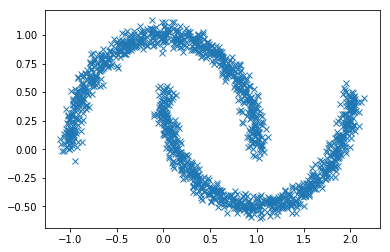

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)

X= noisy_moons[0]
y= noisy_moons[1]

plt.plot(X[:,0], X[:,1], 'x')
plt.show()

In [19]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [20]:
def LogisticRegression(Z, labels, alpha = 0.1, niter = 100, lamda = 0.1):
    theta = np.random.random((Z.shape[1] + 1,1))
    m = len(labels)
    
    Z = np.hstack((np.ones((Z.shape[0],1)) , Z))
    
    for i in range(niter):
    
        h = sigmoid(np.dot(theta.T, Z.T))
        
        J1 = np.sum(np.log(h[labels == 1]))
        
        J2 = np.sum(np.log(1 - h[labels == 0]))
        
        J = 1/(2*m)*(J1 + J2)
        
        delta = (h - labels)

        DJ = 1/(m)*delta @ Z

        theta = (1- alpha*lamda)*theta - alpha * DJ.T
        
    return theta

In [22]:
print(X)
X = np.hstack((X,X**2))
Xnorm = (X - np.min(X, axis = 0))/(np.max(X, axis = 0) - np.min(X, axis = 0))
Xnorm

[[ 3.13634540e-01 -2.21376999e-01  9.83666250e-02  4.90077759e-02]
 [ 1.14822244e-02  1.73895861e-01  1.31841477e-04  3.02397705e-02]
 [ 5.23904243e-03  9.54604441e-01  2.74475656e-05  9.11269638e-01]
 ...
 [ 3.77486599e-02  5.55427013e-01  1.42496133e-03  3.08499166e-01]
 [-1.01099088e+00  4.39452874e-03  1.02210255e+00  1.93118829e-05]
 [-3.12085834e-01  8.98329413e-01  9.73975679e-02  8.06995735e-01]]


array([[4.36203479e-01, 2.19936300e-01, 2.12918971e-02, ...,
        3.84289035e-02, 4.53344887e-04, 1.47678147e-03],
       [3.43406944e-01, 4.48222935e-01, 2.85375482e-05, ...,
        2.37121760e-02, 8.14399128e-10, 5.62267821e-04],
       [3.41489548e-01, 8.99114842e-01, 5.94101776e-06, ...,
        7.14562174e-01, 3.52972478e-11, 5.10599105e-01],
       ...,
       [3.51473850e-01, 6.68573157e-01, 3.08439140e-04, ...,
        2.41906258e-01, 9.51347837e-08, 5.85186418e-02],
       [2.93866464e-02, 3.50328815e-01, 2.21238682e-01, ...,
        1.51317511e-05, 4.89465546e-02, 2.29316464e-10],
       [2.44033241e-01, 8.66613657e-01, 2.10821403e-02, ...,
        6.32796925e-01, 4.44456646e-04, 4.00431954e-01]])

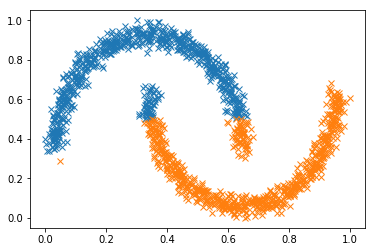

In [23]:
otheta = LogisticRegression(Xnorm, y[None, :], alpha = 0.01, niter= 100)

Xnorm_1 = np.hstack((np.ones((Xnorm.shape[0],1)) , Xnorm))
h = sigmoid(np.dot(otheta.T, Xnorm_1.T))

pred = h >= 0.5
pred = pred.astype(int)

for j in range(2):
    ind = pred == j
    plt.plot(Xnorm[ind[0],0], Xnorm[ind[0],1], 'x')
plt.show()